## Loading Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image

2024-11-18 10:49:29.352796: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 10:49:29.355561: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 10:49:29.363423: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 10:49:29.376469: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-18 10:49:29.380070: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 10:49:29.391034: I tensorflow/core/platform/cpu_feature_gu

## Model Hyperparameters

In [2]:
IMG_SIZE = (224, 224)
NUM_CLASSES = 2
LEARNING_RATE = 0.001
BATCH_SIZE = 32
EPOCHS = 10

## Defining the model
*Using the sigmoid activation function*

In [3]:
def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 2
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten for Dense Layers
        Flatten(),

        # Dense Layers
        Dense(128, activation='relu'),
        Dense(num_classes, activation='sigmoid')  # Output layer
    ])
    return model

In [4]:
input_shape = (*IMG_SIZE, 3)
model = build_cnn_model(input_shape, NUM_CLASSES)
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

/home/tckleme/Documents/Projects/envs/bcc/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731906270.842319   35963 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 10:49:30.843101: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the requ

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

## Loading personal dataset for waste classification

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    './dataset/DATASET/TRAIN',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    './dataset/DATASET/TEST',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 4337 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


In [7]:
print(train_data.class_indices)
print(f"Number of classes: {len(train_data.class_indices)}")


{'O': 0, 'R': 1}
Number of classes: 2


## Training the model

In [8]:
history = model.fit(
    train_data,
    epochs=EPOCHS
)

Epoch 1/10


/home/tckleme/Documents/Projects/envs/bcc/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


136/136 ━━━━━━━━━━━━━━━━━━━━ 71s 513ms/step - accuracy: 0.6967 - loss: 1.1235
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 69s 507ms/step - accuracy: 0.7992 - loss: 0.4620
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 69s 509ms/step - accuracy: 0.8225 - loss: 0.4183
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 69s 510ms/step - accuracy: 0.8632 - loss: 0.3112
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 70s 517ms/step - accuracy: 0.9097 - loss: 0.2317
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 78s 572ms/step - accuracy: 0.9293 - loss: 0.1811
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 76s 556ms/step - accuracy: 0.9581 - loss: 0.1249
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 76s 562ms/step - accuracy: 0.9755 - loss: 0.0866
Epoch 9/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 75s 555ms/step - accuracy: 0.9812 - loss: 0.0495
Epoch 10/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 76s 561ms/step - accuracy: 0.9854 - loss: 0.0499


## Evaluating the model on test data

In [9]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Saving the model
model.save('./cnn_model.h5')

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9030 - loss: 0.4324


Test Loss: 0.8593, Test Accuracy: 0.8173


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step


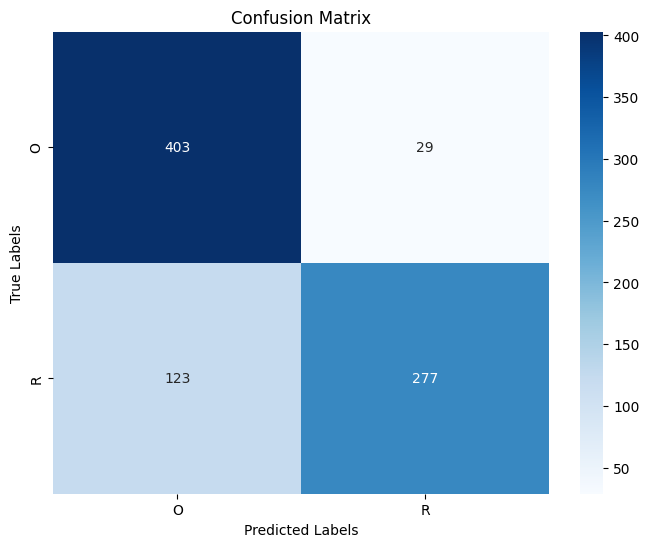

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [11]:
# Precision, Recall, and F1-Score
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=test_data.class_indices.keys()))

Classification Report:
              precision    recall  f1-score   support

           O       0.77      0.93      0.84       432
           R       0.91      0.69      0.78       400

    accuracy                           0.82       832
   macro avg       0.84      0.81      0.81       832
weighted avg       0.83      0.82      0.81       832



In [12]:
# Testing on a Single Image
def predict_image(model, img_path, target_size):
    """
    Loads an image, preprocesses it, and makes a prediction using the model.

    Argumentss:
    - model: Previously trained Keras model.
    - img_path: Path to the image file.
    - target_size: Target size of the image as expected by the model.

    Returns:
    - Predicted class label and confidence score.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalizing to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Getting class index
    confidence = predictions[0][predicted_class]  # Getting confidence score

    return predicted_class, confidence

In [13]:
# Example usage for a single test image
img_path = './dataset/DATASET/TEST/O/O_12572.jpg'
predicted_class, confidence = predict_image(model, img_path, IMG_SIZE)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class: 0, Confidence: 0.6498


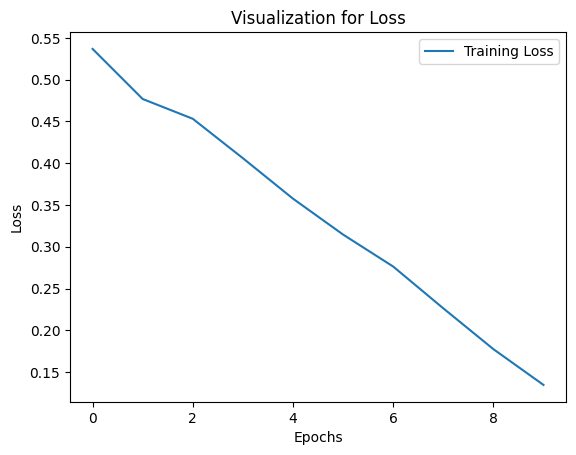

In [34]:
loss = history.history['loss']

plt.plot(loss, label='Training Loss')
plt.title('Visualization for Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# For future:
# 
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

## Using Softmax

In [35]:
def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 2
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten for Dense Layers
        Flatten(),

        # Dense Layers
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    return model

In [36]:
model = build_cnn_model(input_shape, NUM_CLASSES)
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

/home/tckleme/Documents/Projects/envs/bcc/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history = model.fit(
    train_data,
    epochs=EPOCHS
)

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 74s 540ms/step - accuracy: 0.6729 - loss: 1.9252
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 76s 559ms/step - accuracy: 0.8039 - loss: 0.4735
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 76s 561ms/step - accuracy: 0.8467 - loss: 0.3744
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 74s 546ms/step - accuracy: 0.8954 - loss: 0.2751
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 74s 541ms/step - accuracy: 0.9305 - loss: 0.1887
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 75s 553ms/step - accuracy: 0.9396 - loss: 0.1551
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 77s 562ms/step - accuracy: 0.9557 - loss: 0.1279
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 73s 533ms/step - accuracy: 0.9711 - loss: 0.0864
Epoch 9/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 71s 519ms/step - accuracy: 0.9794 - loss: 0.0633
Epoch 10/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 71s 521ms/step - accuracy: 0.9850 - loss: 0.0604


In [39]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Saving the model
model.save('./cnn_model2.h5')

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.8476 - loss: 0.5035


Test Loss: 0.6418, Test Accuracy: 0.8245


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step


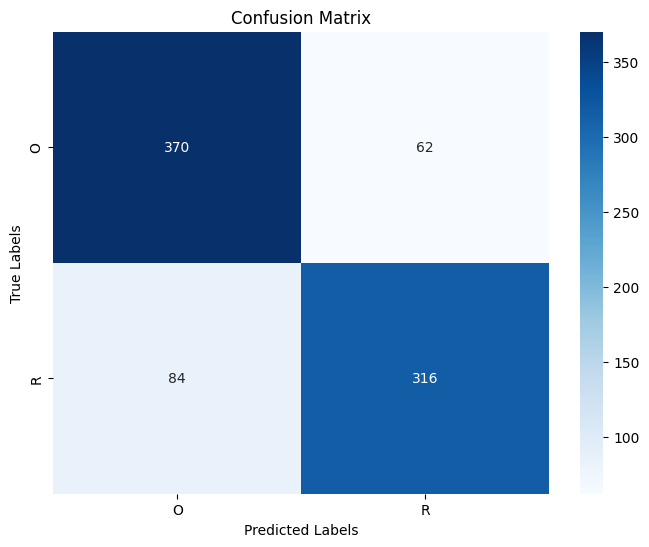

In [40]:
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [41]:
# Precision, Recall, and F1-Score
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=test_data.class_indices.keys()))

Classification Report:
              precision    recall  f1-score   support

           O       0.81      0.86      0.84       432
           R       0.84      0.79      0.81       400

    accuracy                           0.82       832
   macro avg       0.83      0.82      0.82       832
weighted avg       0.83      0.82      0.82       832



In [42]:
# Testing on a Single Image
def predict_image(model, img_path, target_size):
    """
    Loads an image, preprocesses it, and makes a prediction using the model.

    Argumentss:
    - model: Previously trained Keras model.
    - img_path: Path to the image file.
    - target_size: Target size of the image as expected by the model.

    Returns:
    - Predicted class label and confidence score.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalizing to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Getting class index
    confidence = predictions[0][predicted_class]  # Getting confidence score

    return predicted_class, confidence

In [43]:
# Example usage for a single test image
img_path = './dataset/DATASET/TEST/O/O_12572.jpg'
predicted_class, confidence = predict_image(model, img_path, IMG_SIZE)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: 0, Confidence: 0.9999


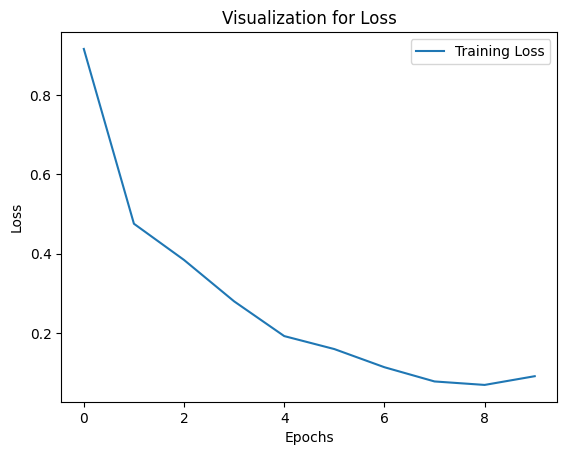

In [44]:
loss = history.history['loss']

plt.plot(loss, label='Training Loss')
plt.title('Visualization for Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

## Putting Stride = 2 with the sigmoid activation function

In [45]:
def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, strides=(2, 2)),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 2
        Conv2D(64, kernel_size=(3, 3), activation='relu', strides=(2, 2)),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten for Dense Layers
        Flatten(),

        # Dense Layers
        Dense(128, activation='relu'),
        Dense(num_classes, activation='sigmoid')  # Output layer
    ])
    return model

In [46]:
model = build_cnn_model(input_shape, NUM_CLASSES)
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

/home/tckleme/Documents/Projects/envs/bcc/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 111, 111, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,212,680 (16.07 MB)

 Trainable params: 1,404,226 (5.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,808,454 (10.71 MB)

In [47]:
history = model.fit(
    train_data,
    epochs=EPOCHS
)

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.6971 - loss: 0.5877
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7856 - loss: 0.4864
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.7934 - loss: 0.4713
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.8246 - loss: 0.4165
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.8464 - loss: 0.3671
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.8778 - loss: 0.3169
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.8987 - loss: 0.2579
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9137 - loss: 0.2186
Epoch 9/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9425 - loss: 0.1605
Epoch 10/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9564 - loss: 0.1261


In [48]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Saving the model
model.save('./cnn_model3.h5')

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9016 - loss: 0.3233


Test Loss: 0.4790, Test Accuracy: 0.8582


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


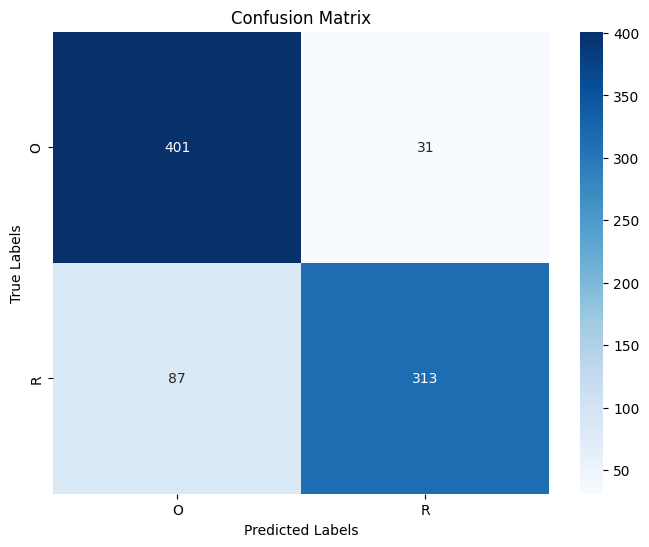

In [49]:
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [50]:
# Precision, Recall, and F1-Score
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=test_data.class_indices.keys()))

Classification Report:
              precision    recall  f1-score   support

           O       0.82      0.93      0.87       432
           R       0.91      0.78      0.84       400

    accuracy                           0.86       832
   macro avg       0.87      0.86      0.86       832
weighted avg       0.86      0.86      0.86       832



In [51]:
# Testing on a Single Image
def predict_image(model, img_path, target_size):
    """
    Loads an image, preprocesses it, and makes a prediction using the model.

    Argumentss:
    - model: Previously trained Keras model.
    - img_path: Path to the image file.
    - target_size: Target size of the image as expected by the model.

    Returns:
    - Predicted class label and confidence score.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalizing to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Getting class index
    confidence = predictions[0][predicted_class]  # Getting confidence score

    return predicted_class, confidence

In [52]:
# Example usage for a single test image
img_path = './dataset/DATASET/TEST/O/O_12572.jpg'
predicted_class, confidence = predict_image(model, img_path, IMG_SIZE)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Class: 0, Confidence: 1.0000


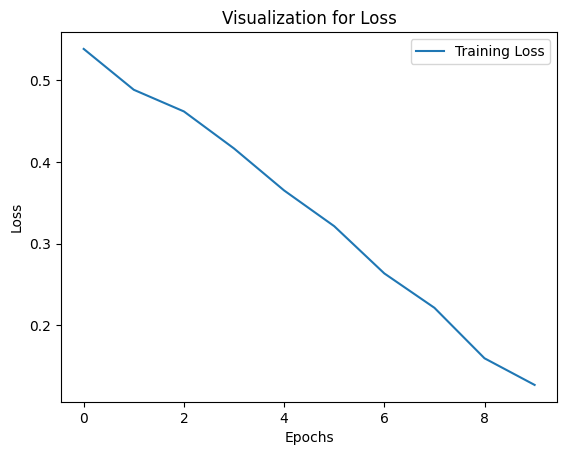

In [53]:
loss = history.history['loss']

plt.plot(loss, label='Training Loss')
plt.title('Visualization for Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()